# Bird distributions

Let's discover some facts about the distributions of data in this dataset. In the *notebook.ipynb* file at the root of this lesson folder, import `Pandas`, Matplotlib, and your data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/microsoft/Data-Science-For-Beginners/refs/heads/main/data/birds.csv'
birds = pd.read_csv(url)
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


In general, you can quickly look at the way data is distributed by using a scatter plot as we did in the previous lesson:

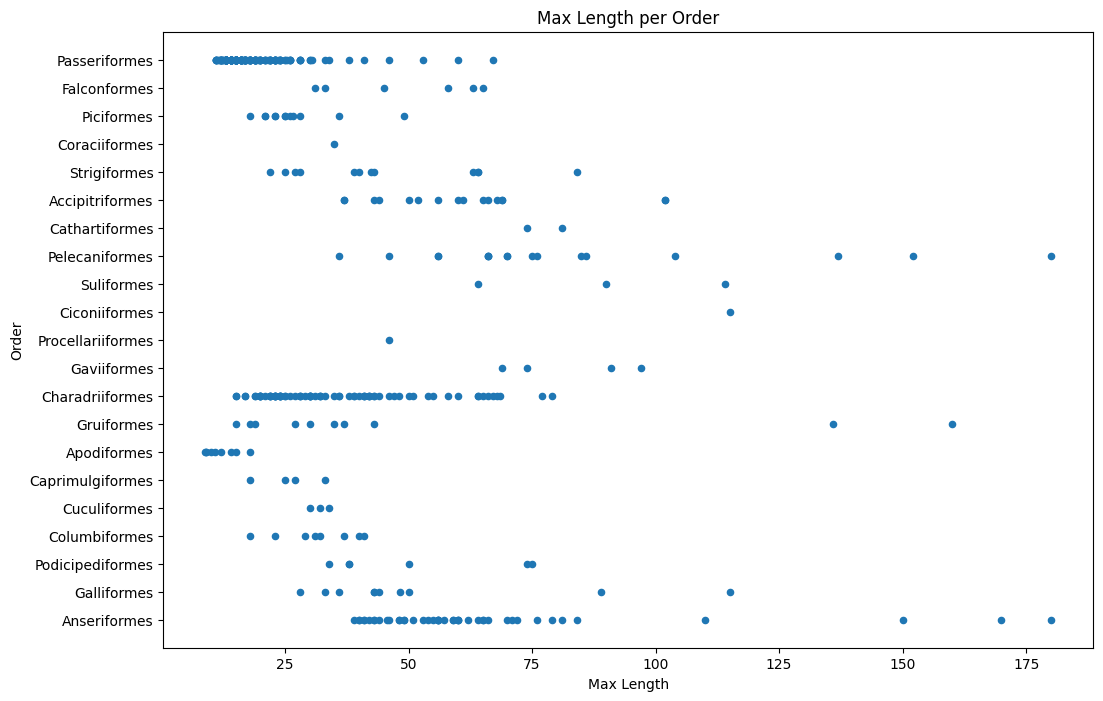

In [ ]:
birds.plot(kind='scatter',x='MaxLength',y='Order',figsize=(12,8))

plt.title('Max Length per Order')
plt.ylabel('Order')
plt.xlabel('Max Length')

plt.show()

Matplotlib offers very good ways to visualize data distribution using Histograms. This type of chart is like a bar chart where the distribution can be seen via a rise and fall of the bars. To build a histogram, you need numeric data. To build a Histogram, you can plot a chart defining the kind as 'hist' for Histogram. This chart shows the distribution of MaxBodyMass for the entire dataset's range of numeric data. By dividing the array of data it is given into smaller bins, it can display the distribution of the data's values:

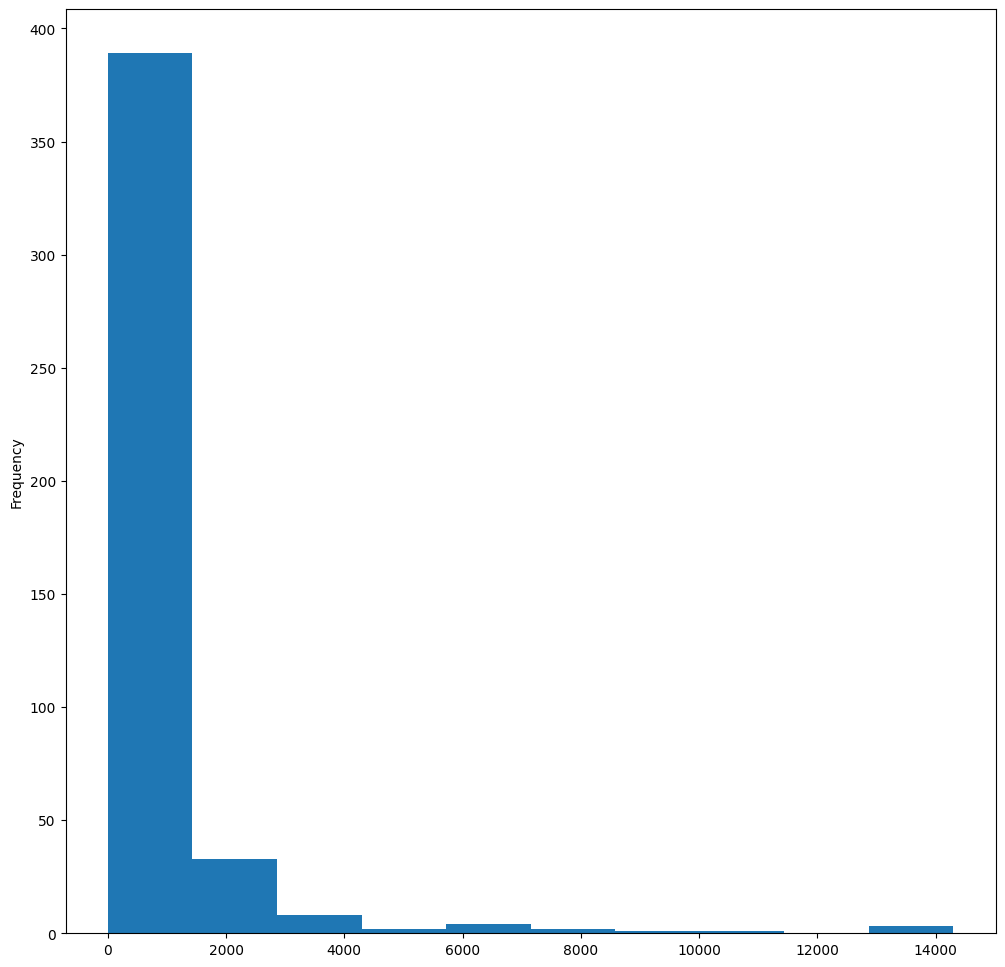

In [ ]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 10, figsize = (12,12))
plt.show()

As you can see, most of the 400+ birds in this dataset fall in the range of under 2000 for their Max Body Mass. Gain more insight into the data by changing the `bins` parameter to a higher number, something like 30:

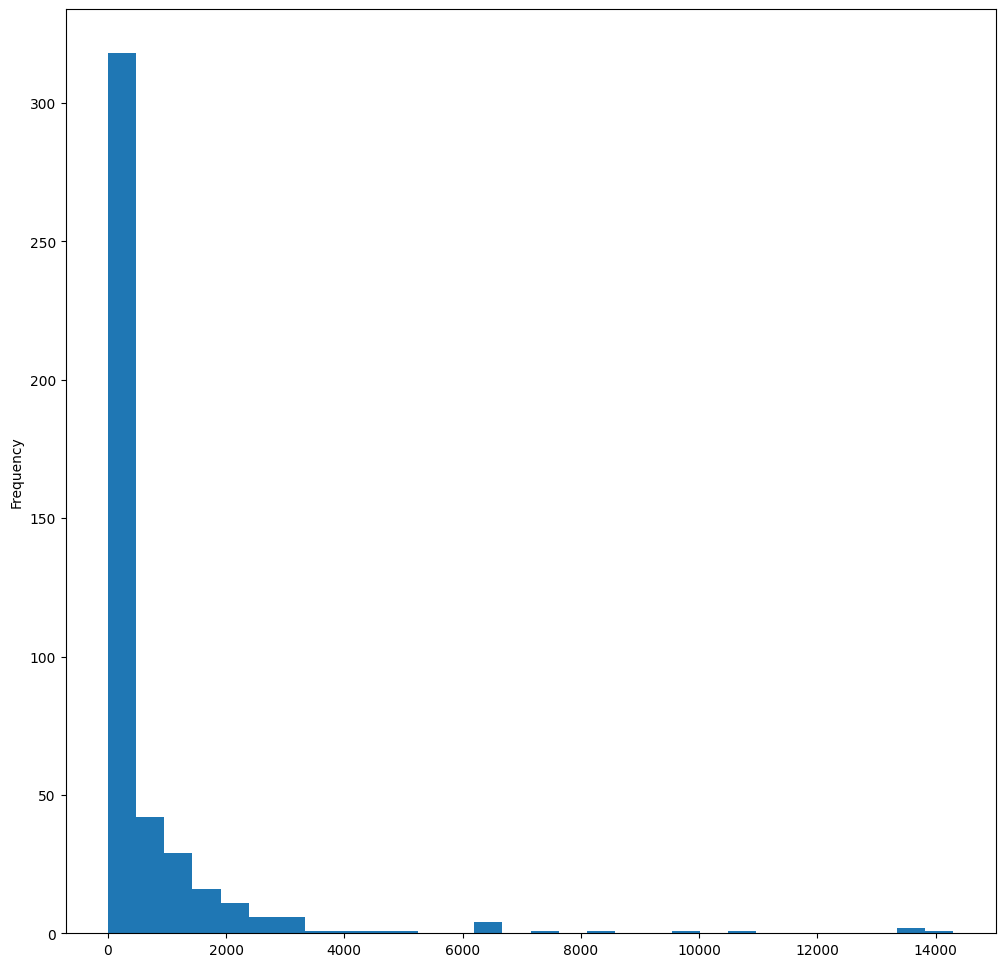

In [ ]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 30, figsize = (12,12))
plt.show()

This chart shows the distribution in a bit more granular fashion. A chart less skewed to the left could be created by ensuring that you only select data within a given range:

Filter your data to get only those birds whose body mass is under 60, and show 40 `bins`:

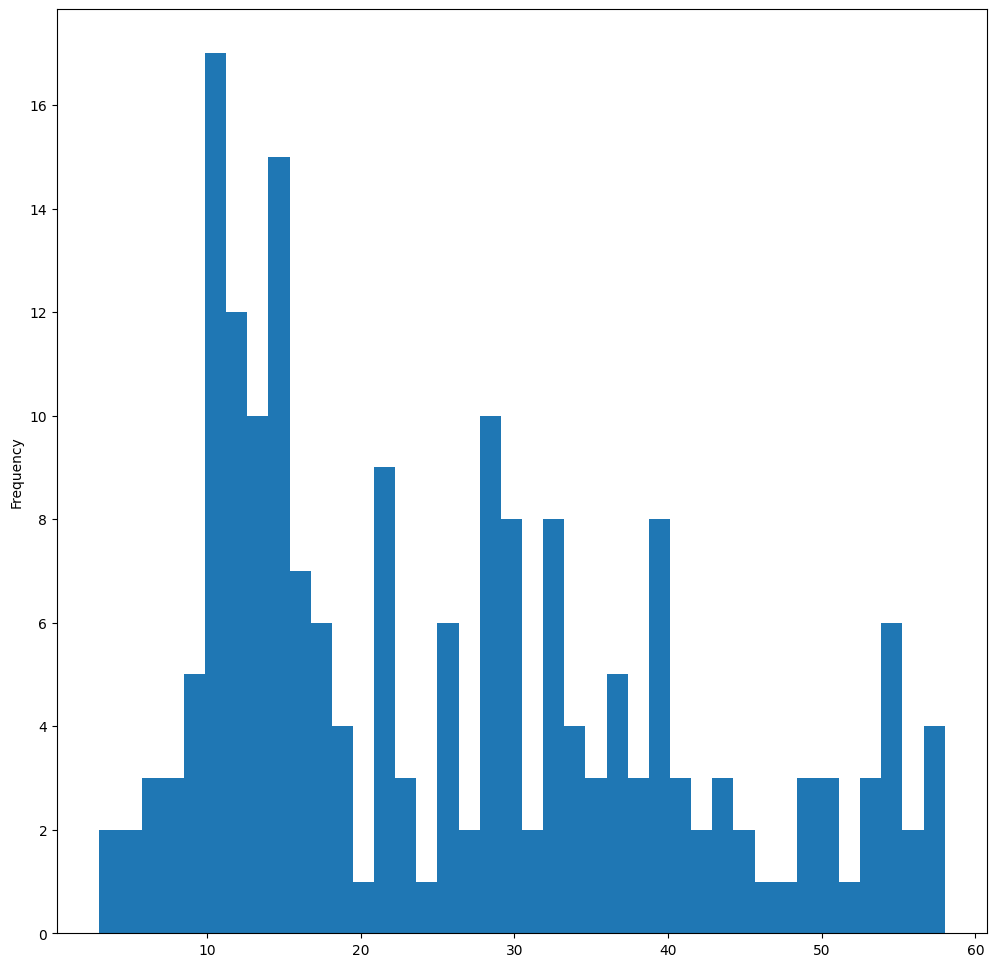

In [2]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]
filteredBirds['MaxBodyMass'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show()

Create a 2D histogram to compare the relationship between two distributions. Let's compare `MaxBodyMass` vs. `MaxLength`. Matplotlib offers a built-in way to show convergence using brighter colors:

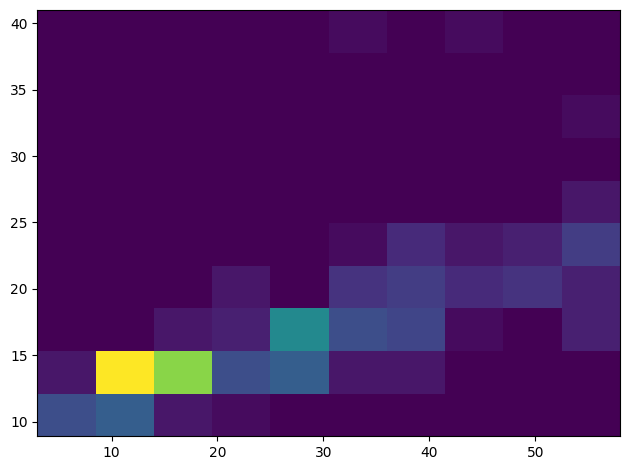

In [ ]:
x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

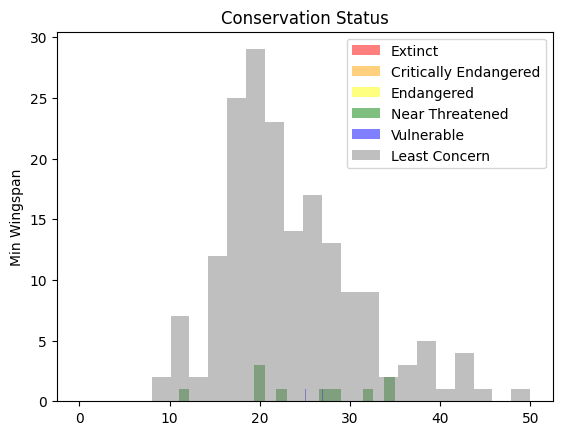

In [3]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Min Wingspan')
plt.legend();